   Channel  Counts
0        0       2
1        1       0
2        2       0
3        3       0
4        4       0


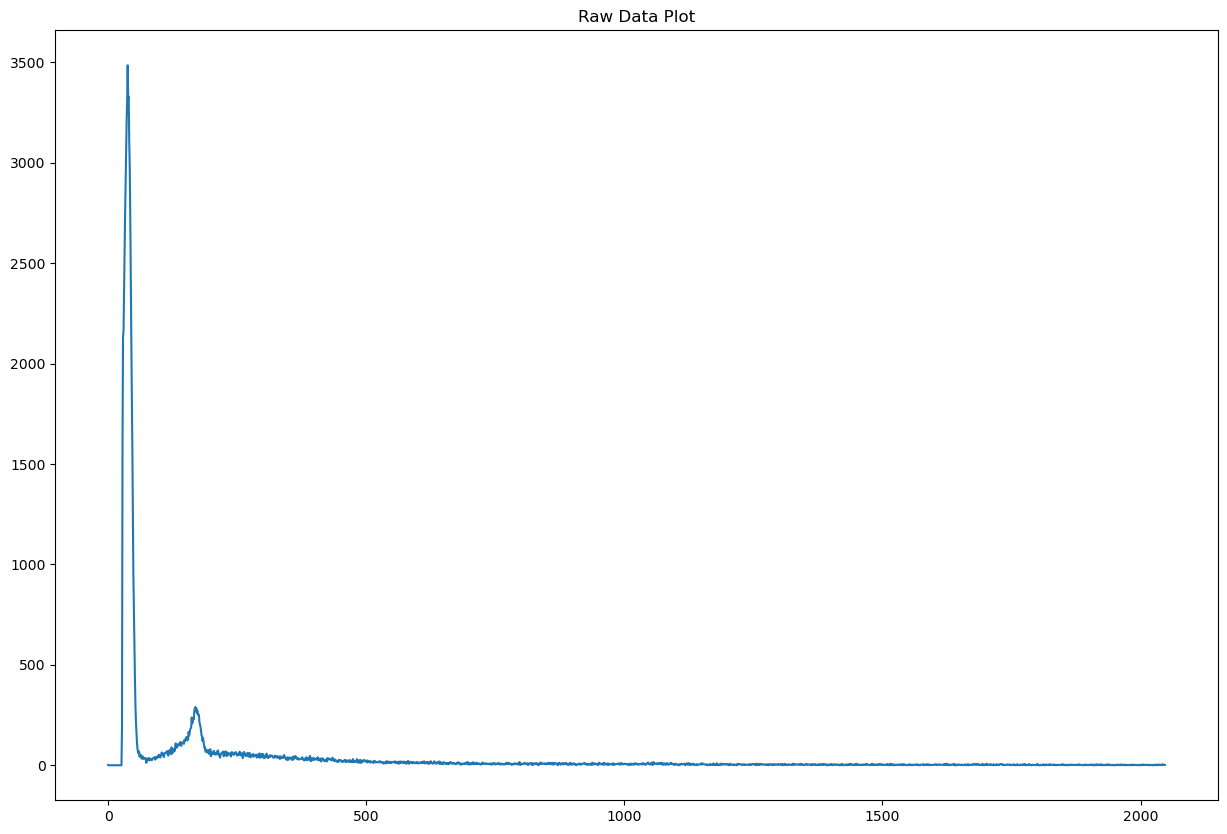

In [8]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Cd_109 = pd.read_csv("Cd_109.csv") # create pandas dataframe
print(df_Cd_109.head()) # print first 5 rows


##############
# Plot data
##############

x_Cd_109 = df_Cd_109["Channel"] # grab column
y_Cd_109 = df_Cd_109["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("")
plt.ylabel("")
plt.title("Raw Data Plot")
plt.plot(x_Cd_109, y_Cd_109)
plt.show()

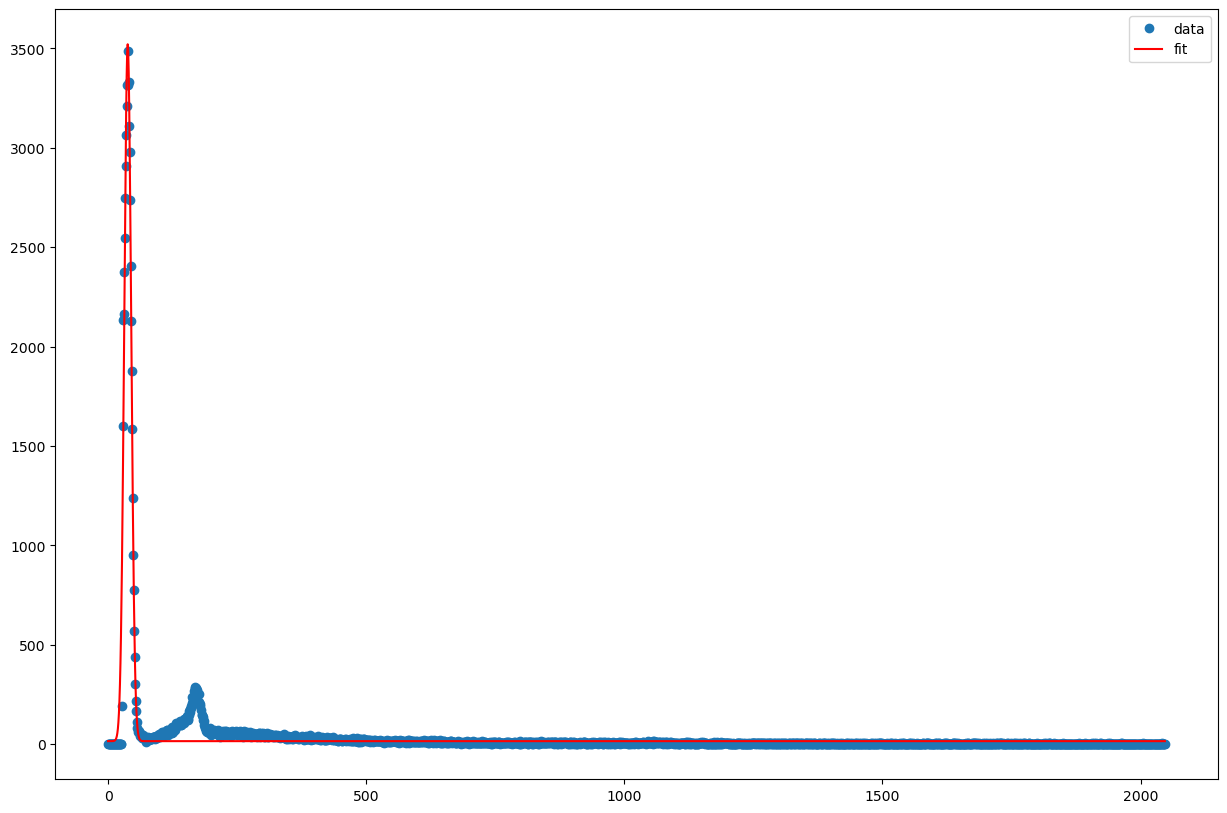

In [5]:
########################
# Input constant values
########################

a_Cd_109 = 3500 # amplitude                   
mean_Cd_109 = 40 # middle of graph                 
h_Cd_109 = 15 # vertical shift                  
sigma_Cd_109 = 6 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_Cd_109, a_Cd_109, mean_Cd_109, sigma_Cd_109, h_Cd_109):
    fit = a_Cd_109*np.exp((-(x_Cd_109-mean_Cd_109)**2)/(2*sigma_Cd_109**2)) + h_Cd_109
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Cd_109, pcov_Cd_109 = curve_fit(gaus, x_Cd_109, y_Cd_109, p0=[a_Cd_109, mean_Cd_109, sigma_Cd_109, h_Cd_109]) # solves for a, mean, sigma, h
y_Cd_109_fit = gaus(x_Cd_109, *popt_Cd_109) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Cd_109, y_Cd_109, 'o', label="data")
plt.plot(x_Cd_109, y_Cd_109_fit, 'r-', label='fit')
# plt.xlabel("Wavelength (nm)")
# plt.ylabel("Intesity (I)")
# plt.title("Hydrogen Gaussian Plot")
plt.legend()
plt.show()

In [4]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_Cd_109[0],
      "\n Fit Mean: ", popt_Cd_109[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_Cd_109[2],
      "\n Fit Height: ", popt_Cd_109[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_Cd_109)

Fit Amplitude:  3504.9366100703282 
 Fit Mean:  38.06842157703928 
 Fit Sigma (distance from mean to sides):  6.719117518144947 
 Fit Height:  15.743994227244741

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 3.02213849e+02  3.23626613e-08 -3.83181358e-01 -8.41475750e-01]
 [ 3.23626613e-08  1.47783962e-03 -5.80660593e-11 -3.89383425e-10]
 [-3.83181358e-01 -5.80660593e-11  1.48658572e-03 -3.22615982e-03]
 [-8.41475750e-01 -3.89383425e-10 -3.22615982e-03  1.19002502e+00]]
